# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\trent\Desktop\BEE4750\hw2-tad95`
   Installed Libmount_jll ────────────── v2.35.0+0
   Installed GR_jll ──────────────────── v0.72.7+0
   Installed Accessors ───────────────── v0.1.37
   Installed JpegTurbo_jll ───────────── v2.1.91+0
   Installed Xorg_xkbcomp_jll ────────── v1.4.2+4
   Installed Preferences ─────────────── v1.4.0
   Installed LoggingExtras ───────────── v1.0.0
   Installed Contour ─────────────────── v0.6.2
   Installed ConcurrentUtilities ─────── v2.2.0
   Installed Roots ───────────────────── v2.1.6
   Installed InlineStrings ───────────── v1.4.0
   Installed OpenSSL ─────────────────── v1.4.1
   Installed RelocatableFolders ──────── v1.0.0
   Installed Xorg_libpthread_stubs_jll ─ v0.1.0+3
   Installed Unitful ─────────────────── v1.14.0
   Installed Formatting ──────────────── v0.4.2
   Installed InvertedIndices ─────────── v1.3.0
   Installed HTTP ────────────────────── v1.9.7
   Installed Cairo_jll ───────────────── v1.16.1+1
   

In [1]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>


**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

The maximum concentration of CRUD in the river falls below the regulatory limit of 20kg/1000m^3

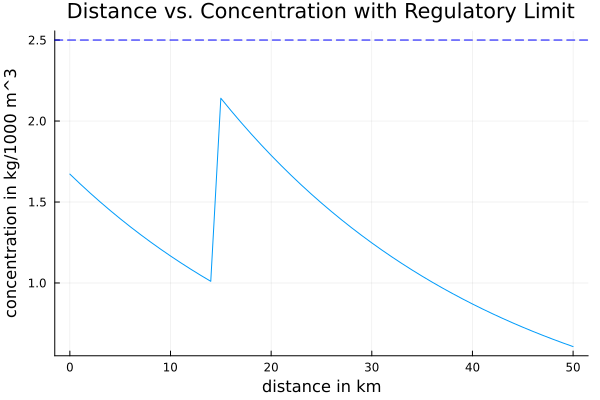

In [22]:
function conc_CRUD(d)
    if d<15
        c=1.6724*exp(-0.36*(d/10)) #concentration for distances less than 15km
    else
        c=(250*1.6724*exp(-0.36*(d/10))+420*exp(-0.36*((d-15)/10)))/310 #concentration more than 15km
    end
    return c
end

distances=0:1:50
concentrations=[conc_CRUD(d) for d in distances]
if maximum(concentrations)<2.5
    print("The maximum concentration of CRUD in the river falls below the regulatory limit of 20kg/1000m^3")
else
    print("The maximum concentration of CRUD in the river is above the regulatory limit of 20kg/1000m^3, see graph for more details")
end


plot(distances, concentrations, xlabel="distance in km", ylabel="concentration in kg/1000 m^3", title = "Distance vs. Concentration with Regulatory Limit", legend=false)
     hline!([2.5], linestyle= :dash, color=:blue, label = "Regulatory Limit of CRUD (20kg/1000m^3)")


____________________explanation____________________________


For this question, I realized that I could seperate the distance input into two situations: before and after 15km. Before 15km, the only input of CRUD could be the first input, but after 15 km, the concentration would be both. 

As a result, the d<15 is relatively simple because it is just one input, one decay. So for this, I used the following equation, with C1 stqanding for the concentration from input 1:
C1=((Qr*Cr)+(Qcrud1*Ccrud1))/(Qr+Qcrud1), to determine what the concetration would be without any decay, then I would multiply this consstant with e^((k*d)/10)

For values: 
Qr, the flow rate of the river, is given as 250,000 m^3/d
Cr, the concentration of Crud in the river, is 0.5 kg/(1000m^3)
Qcrud1, or the flow rate of the first crud input, is 40,000 m^3/d
Ccrud1, or the concentration of teh first Crud input, is 9 kg/(1000 m^3)

Plugging these numbers in: 
 c=1.6724*exp(-0.36*(d/10)) is the equation for when d<15


For d>15, the situation has two inputs, and two decay terms that are seperated. 

The first part of the equation is the contribution input 1 has to the concentration, so it looks familiar: Qr*C1*e^((k*d)/10)
The second part is adding this concentration to the contribution from input 2: 
C2=(Qcrud2*Ccrud2)/(Qr+Qcrud2)
where c2 is the value of CRUD without degradation, 
Qcrud2 being the flow rate of crud input 2, or 60,000 m^3/d
Ccrud2, the concentration of crud in input 2, or 7kg/1000 m^3
and k being -0.36.
Then I have to add the degredation term, which is very similar to that of c1, but i have to put the position in context of the inpur 2 being 15m downstream:
exp(-0.36*((d-15)/10))
Thus: c2=1.355*exp(-0.36*((d-15)/10))

____________________explanation____________________________

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

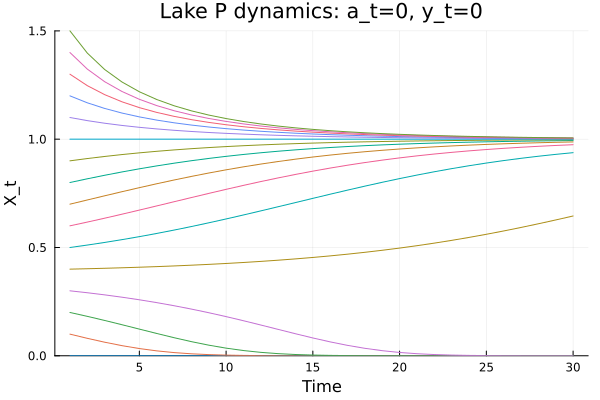

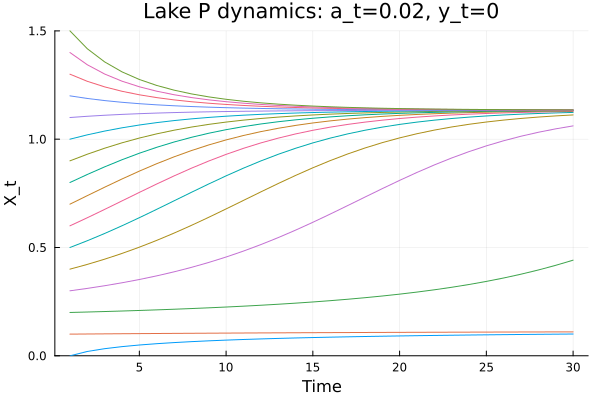

Equilibrium for a_t=0, y_t=0: 1.0
Equilibrium for a_t=0.02, y_t=0: 1.1341008852434813
simulate_lake_P(0.5, 30, 0.5, 1.5, zeros(30), zeros(30)) = [0.5, 0.5112038749637415, 0.5232711847200154, 0.5362205705370966, 0.5500592565409285, 0.5647805826297403, 0.5803616236029719, 0.5967610929157121, 0.6139177629410592, 0.6317496466987189, 0.6501541687910343, 0.669009498789338, 0.68817712753002, 0.7075056430657318, 0.72683552456713, 0.7460046420736528, 0.7648540521462027, 0.7832336341083364, 0.8010071284390069, 0.8180562147474728, 0.8342833863326259, 0.8496135186813152, 0.8639941659682701, 0.8773947324849414, 0.8898047426215632, 0.9012314700370958, 0.9116971878687418, 0.9212362758524453, 0.9298923774127128, 0.9377157498998743]


30-element Vector{Float64}:
 0.5
 0.5112038749637415
 0.5232711847200154
 0.5362205705370966
 0.5500592565409285
 0.5647805826297403
 0.5803616236029719
 0.5967610929157121
 0.6139177629410592
 0.6317496466987189
 ⋮
 0.8496135186813152
 0.8639941659682701
 0.8773947324849414
 0.8898047426215632
 0.9012314700370958
 0.9116971878687418
 0.9212362758524453
 0.9298923774127128
 0.9377157498998743

In [30]:
using Plots, Roots

# Phosphorus recycling and outflow functions
lake_P_cycling(x, q) = x.^q ./ (1 .+ x.^q)
lake_P_out(x, b) = b .* x

# Model simulation function
function simulate_lake_P(X_ic, T, b, q, a, y)
    X = zeros(T)
    X[1] = X_ic
    for t = 2:T
        X[t] = X[t-1] + a[t] + y[t] + lake_P_cycling(X[t-1], q) - lake_P_out(X[t-1], b)
    end
    return X
end

# Define constants
T = 30
X_vals = collect(0.0:0.1:1.5)  # X_vals now only goes up to 1.5
b = 0.5
q = 1.5

# Case 1: a_t = 0 and y_t = 0
a_zeros = zeros(T)
y_zeros = zeros(T)

# Simulate lake P dynamics with no inflows
X_case1 = map(x -> simulate_lake_P(x, T, b, q, a_zeros, y_zeros), X_vals)

# Plot for case 1 (one by one), y-axis limited to 1.5
p1 = plot(title="Lake P dynamics: a_t=0, y_t=0", xlabel="Time", ylabel="X_t", legend=false, ylim=(0, 1.5))
for X in X_case1
    plot!(p1, X)
end

# Ensure the plot displays
display(p1)

# Find equilibria where X_{t+1} = X_t using Roots.jl
function lake_P_delta(x, b, q, a, y)
    return a + y + lake_P_cycling(x, q) - lake_P_out(x, b)
end

# Find equilibrium for a_t = 0, y_t = 0
eq1 = find_zero(x -> lake_P_delta(x, b, q, 0, 0), 1.0)
println("Equilibrium for a_t=0, y_t=0: $eq1")

# Case 2: a_t = 0.02 and y_t = 0
a_const = fill(0.02, T)

# Simulate lake P dynamics with a constant point-source release
X_case2 = map(x -> simulate_lake_P(x, T, b, q, a_const, y_zeros), X_vals)

# Plot for case 2 (one by one), y-axis limited to 1.5
p2 = plot(title="Lake P dynamics: a_t=0.02, y_t=0", xlabel="Time", ylabel="X_t", legend=false, ylim=(0, 1.5))
for X in X_case2
    plot!(p2, X)
end

# Ensure the plot displays
display(p2)

# Find equilibrium for a_t = 0.02, y_t = 0
eq2 = find_zero(x -> lake_P_delta(x, b, q, 0.02, 0), 1.0)
println("Equilibrium for a_t=0.02, y_t=0: $eq2")

# Testing the function
@show simulate_lake_P(0.5, 30, 0.5, 1.5, zeros(30), zeros(30))


## References

List any external references consulted, including classmates.